# **Working memory training**: DMN, FPN rectuitment and integration stats

Karolina Finc | Centre for Modern Interdisciplinary Technologies, Nicolaus Copernicus University in Toruń, Poland

**Last edited:** 04-10-2018

Step 0: Setup
------------------

In [1]:
# Loading packages
library(psych)
library(tidyverse)
library(data.table)
library(nlme)
library(broom)

# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=25, colour='#262626ff'),
          axis.text.x = element_text(size=25, colour='#262626ff'),
          axis.title.y = element_text(size=25, colour='#262626ff'),
          axis.title.x  = element_text(size=25, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.8),
          panel.background = element_rect(fill="transparent",colour=NA),
          plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=25),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.15, "cm"),
          aspect.ratio = 1)



── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



Step 1: Loading data
------------------

In [2]:
setwd("~/Dropbox/Projects/LearningBrain/")
fc_cartography = read.csv('data/neuroimaging/03-modularity/dynamic/04-recruitment_integration/Power_integration_recruitment_all_networks.csv')

dualnback_exclude = c('sub-13', 'sub-21', 'sub-23', 'sub-50') # higly motion subjects in one of four sessions

fc_cartography$Session <- factor(fc_cartography$Session, levels = c('Naive', 'Early', 'Middle', 'Late'))
fc_cartography_clean <- fc_cartography %>% filter(!(Subject %in% dualnback_exclude))

dmn <- fc_cartography_clean %>% filter(Network == 'DM')
fpn <- fc_cartography_clean %>% filter(Network == 'FP')

Step 2: Multilevel modeling (FP recruitmnent)
--------------------------------

In [3]:
baseline <- lme(FP ~ 1, random = ~ 1 |Subject/Session, data = fpn, method = 'ML',  control=lmeControl(returnObject=TRUE))#control = list(opt = "optim"))
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)

anova(baseline, session, group, session_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = FP ~ 1, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",1,4,-571.3567,-558.8608,289.6784,,NA,NA
session,"lme.formula(fixed = FP ~ Session, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",2,7,-580.5992,-558.7314,297.2996,1 vs 2,15.242478,0.001620733
group,"lme.formula(fixed = FP ~ Session + Group, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",3,8,-586.4747,-561.4829,301.2373,2 vs 3,7.875472,0.005010979
session_group,"lme.formula(fixed = FP ~ Session + Group + Session:Group, data = fpn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",4,11,-592.3732,-558.0096,307.1866,3 vs 4,11.898588,0.007738753


In [23]:
summary(session_group)

Linear mixed-effects model fit by maximum likelihood
 Data: fpn 
        AIC       BIC   logLik
  -592.3732 -558.0096 307.1866

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:  0.03112223

 Formula: ~1 | Session %in% Subject
        (Intercept)   Residual
StdDev:  0.02928741 0.01278855

Fixed effects: FP ~ Session + Group + Session:Group 
                                     Value   Std.Error  DF  t-value p-value
(Intercept)                      0.3963369 0.009974699 120 39.73422  0.0000
SessionEarly                     0.0287134 0.010105935 120  2.84124  0.0053
SessionMiddle                    0.0191702 0.010105935 120  1.89693  0.0602
SessionLate                      0.0165277 0.010105935 120  1.63544  0.1046
GroupExperimental                0.0313186 0.014106355  40  2.22018  0.0321
SessionEarly:GroupExperimental  -0.0252669 0.014291951 120 -1.76791  0.0796
SessionMiddle:GroupExperimental  0.0033234 0.014291951 120  0.23254  0.8165
SessionLate:GroupExperimental   

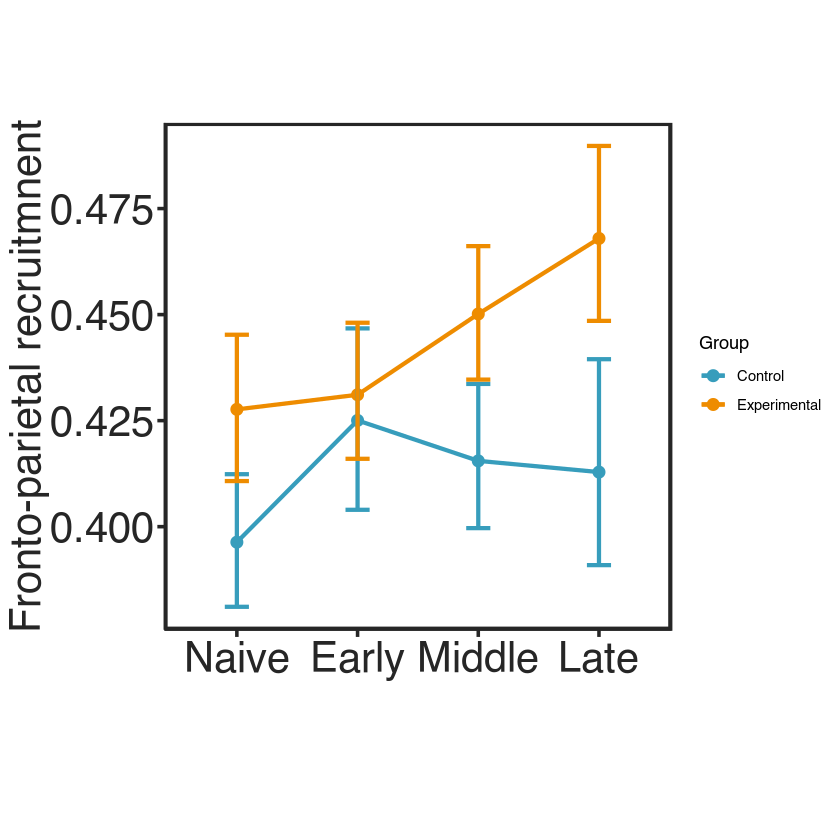

In [27]:
p <- ggplot(fpn, aes(x = Session, y = FP, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    ylab('Fronto-parietal recruitmnent') +
    #facet_wrap(~Group) +
    xlab(' ') +
    theme_training
p

ggsave("figures/Figure_FP_recr.pdf", plot = p, width = 6, height = 6, dpi = 300)  

In [14]:
fpn %>% filter(Session=='Naive') %>% filter(Subject=='sub-27')

Subject,Group,Session,Network,AU,CER,CO,DA,DM,FP,MEM,SAL,SOM,SUB,UNC,VA,VIS
sub-27,Experimental,Naive,FP,0.2918323,0.293105,0.3097786,0.3499309,0.2831103,0.4119152,0.348484,0.3560367,0.3208817,0.3124523,0.2962743,0.3250844,0.2809935


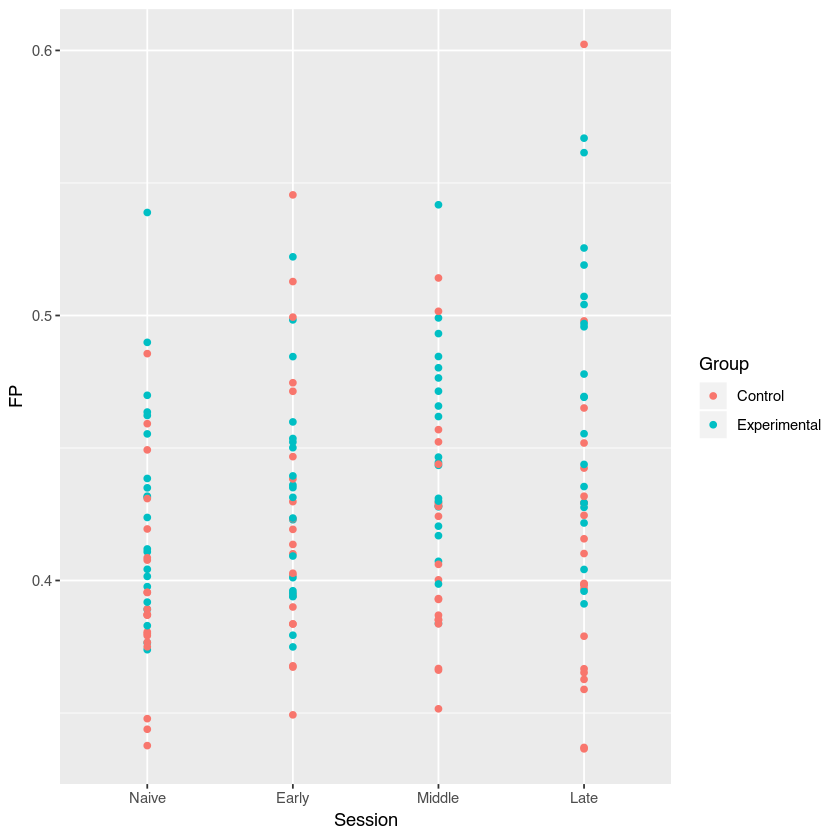

In [6]:
p <- ggplot(fpn, aes(x = Session, y = FP, col = Group)) + geom_point()
p

In [15]:
fpn %>% 
    group_by(Session, Group) %>% filter(Session %in% c('Naive', 'Late'))%>%
    summarize(mFP = mean(FP))

Session,Group,mFP
Naive,Control,0.3963369
Naive,Experimental,0.4276555
Late,Control,0.4128646
Late,Experimental,0.4679554


In [3]:
fpn_nl <- fpn %>% filter(Session %in% c('Naive', 'Late'))

fpn_exp <-  fpn_nl %>% filter(Group == 'Experimental') 
fpn_con <-  fpn_nl %>% filter(Group == 'Control') 

t.test(fpn_exp$FP ~ fpn_exp$Session, paired = TRUE)
t.test(fpn_con$FP ~ fpn_con$Session, paired = TRUE)


	Paired t-test

data:  fpn_exp$FP by fpn_exp$Session
t = -3.5157, df = 20, p-value = 0.002175
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06421111 -0.01638866
sample estimates:
mean of the differences 
            -0.04029989 



	Paired t-test

data:  fpn_con$FP by fpn_con$Session
t = -1.6887, df = 20, p-value = 0.1068
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03694319  0.00388780
sample estimates:
mean of the differences 
             -0.0165277 


In [38]:
naive <- fpn_nl %>% filter(Session == 'Naive') 
t.test(naive$FP ~ naive$Group, paired = FALSE)
wilcox.test(naive$FP ~ naive$Group)


	Welch Two Sample t-test

data:  naive$FP by naive$Group
t = -2.5851, df = 39.463, p-value = 0.01354
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.055814274 -0.006822983
sample estimates:
     mean in group Control mean in group Experimental 
                 0.3963369                  0.4276555 



	Wilcoxon rank sum test

data:  naive$FP by naive$Group
W = 119, p-value = 0.01001
alternative hypothesis: true location shift is not equal to 0


In [34]:
naive_clean <- fpn_nl %>% filter(Session == 'Naive') %>% filter(FP < 0.5)  %>% filter(FP > 0.34)

t.test(naive_clean$FP ~ naive_clean$Group, paired = FALSE)


	Welch Two Sample t-test

data:  naive_clean$FP by naive_clean$Group
t = -2.0965, df = 37.911, p-value = 0.04277
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0448718554 -0.0007831846
sample estimates:
     mean in group Control mean in group Experimental 
                 0.3992682                  0.4220957 


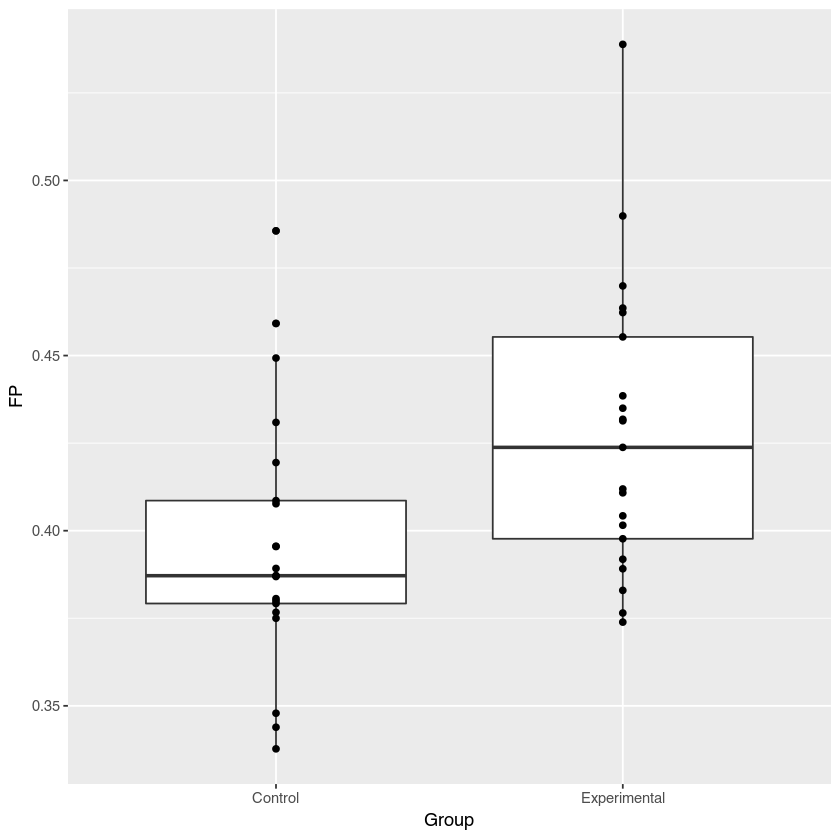

In [40]:
naive %>%  ggplot(aes(x = Group, y = FP)) + geom_boxplot() + geom_point()


Step 3: Multilevel modeling (DM recruitmnent)
--------------------------------

In [11]:
baseline <- lme(DM ~ 1, random = ~ 1 |Subject/Session, data = dmn, method = 'ML',  control=lmeControl(returnObject=TRUE))#control = list(opt = "optim"))
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)


anova(baseline, session, group, session_group) 

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = DM ~ 1, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",1,4,-572.9167,-560.4209,290.4584,,NA,NA
session,"lme.formula(fixed = DM ~ Session, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",2,7,-595.0112,-573.1434,304.5056,1 vs 2,28.094449,3.469963e-06
group,"lme.formula(fixed = DM ~ Session + Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",3,8,-597.2368,-572.2451,306.6184,2 vs 3,4.225648,3.981742e-02
session_group,"lme.formula(fixed = DM ~ Session + Group + Session:Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",4,11,-595.7550,-561.3914,308.8775,3 vs 4,4.518187,2.106737e-01


In [17]:
summary(session)

Linear mixed-effects model fit by maximum likelihood
 Data: fpn 
        AIC       BIC   logLik
  -580.5992 -558.7314 297.2996

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:  0.03457936

 Formula: ~1 | Session %in% Subject
        (Intercept)   Residual
StdDev:  0.03063129 0.01357088

Fixed effects: FP ~ Session 
                  Value   Std.Error  DF  t-value p-value
(Intercept)   0.4119962 0.007519368 123 54.79133  0.0000
SessionEarly  0.0160799 0.007399553 123  2.17309  0.0317
SessionMiddle 0.0208319 0.007399553 123  2.81529  0.0057
SessionLate   0.0284138 0.007399553 123  3.83993  0.0002
 Correlation: 
              (Intr) SssnEr SssnMd
SessionEarly  -0.492              
SessionMiddle -0.492  0.500       
SessionLate   -0.492  0.500  0.500

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-0.81047518 -0.27253386 -0.06676332  0.26882409  0.92495032 

Number of Observations: 168
Number of Groups: 
             Sub

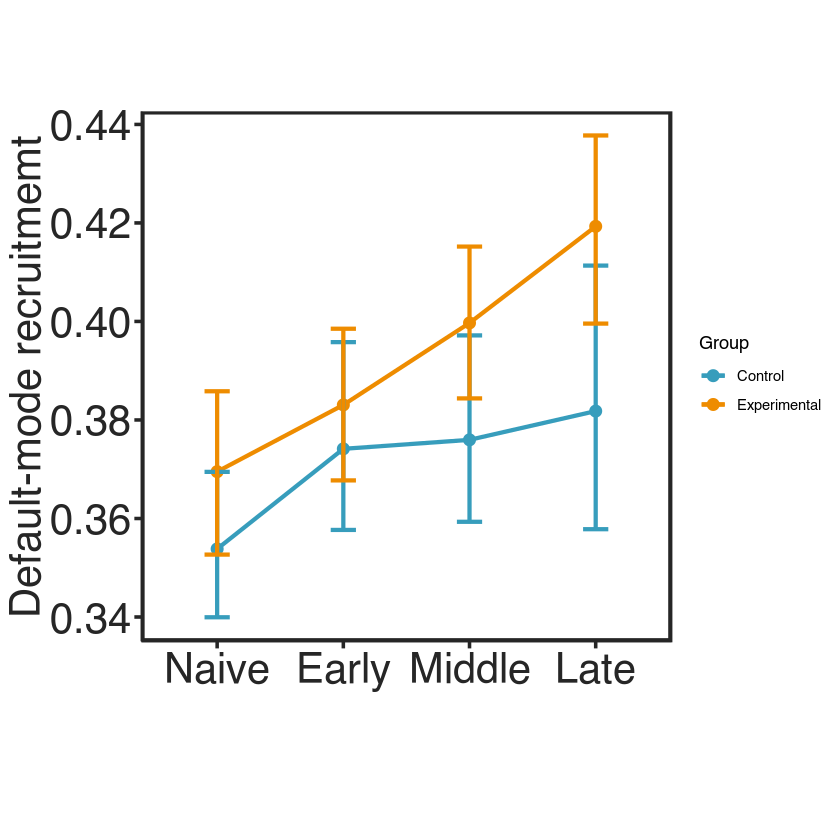

In [28]:
p <- ggplot(dmn, aes(x = Session, y = DM, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    ylab('Default-mode recruitmemt') +
    xlab(' ') +
    theme_training
p

ggsave("figures/Figure_DM_recr.pdf", plot = p, width = 6, height = 6, dpi = 300)  

In [13]:
dmn_nl <- dmn %>% filter(Session %in% c('Naive', 'Late'))

dmn_exp <-  dmn_nl %>% filter(Group == 'Experimental') 
dmn_con <-  dmn_nl %>% filter(Group == 'Control') 

t.test(dmn_exp$DM ~ fpn_exp$Session, paired = TRUE)
t.test(dmn_con$DM ~ fpn_con$Session, paired = TRUE)


	Paired t-test

data:  dmn_exp$DM by fpn_exp$Session
t = -4.6698, df = 20, p-value = 0.0001474
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07204050 -0.02755267
sample estimates:
mean of the differences 
            -0.04979659 



	Paired t-test

data:  dmn_con$DM by fpn_con$Session
t = -2.9269, df = 20, p-value = 0.008337
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04792828 -0.00804021
sample estimates:
mean of the differences 
            -0.02798424 


In [14]:
dmn %>% 
    group_by(Session, Group) %>% filter(Session %in% c('Naive', 'Late'))%>%
    summarize(mDM = mean(DM))
    

Session,Group,mDM
Naive,Control,0.3538219
Naive,Experimental,0.3695092
Late,Control,0.3818061
Late,Experimental,0.4193058


Step 4: Multilevel modeling (FP-DM integration)
-----------------------------

In [16]:
baseline <- lme(FP ~ 1, random = ~ 1 |Subject/Session, data = dmn, method = 'ML',  control=lmeControl(returnObject=TRUE))#control = list(opt = "optim"))
session <- update(baseline, .~. + Session)
group <- update(session, .~. + Group)
session_group <- update(group, .~. + Session:Group)


anova(baseline, session, group, session_group) 

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = FP ~ 1, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",1,4,-830.4217,-817.9258,419.2108,,NA,NA
session,"lme.formula(fixed = FP ~ Session, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",2,7,-834.1625,-812.2947,424.0812,1 vs 2,9.74076797,0.02090324
group,"lme.formula(fixed = FP ~ Session + Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",3,8,-832.1999,-807.2082,424.1000,2 vs 3,0.03743757,0.84657688
session_group,"lme.formula(fixed = FP ~ Session + Group + Session:Group, data = dmn, random = ~1 | Subject/Session, method = ""ML"", control = lmeControl(returnObject = TRUE))",4,11,-832.8025,-798.4388,427.4012,3 vs 4,6.60254786,0.08570483


In [20]:
summary(session)

Linear mixed-effects model fit by maximum likelihood
 Data: dmn 
        AIC       BIC   logLik
  -834.1625 -812.2947 424.0812

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:  0.01693587

 Formula: ~1 | Session %in% Subject
        (Intercept)   Residual
StdDev:  0.01422053 0.00638405

Fixed effects: FP ~ Session 
                    Value   Std.Error  DF  t-value p-value
(Intercept)    0.26838011 0.003594723 123 74.65947  0.0000
SessionEarly   0.00152752 0.003442770 123  0.44369  0.6580
SessionMiddle  0.00192351 0.003442770 123  0.55871  0.5774
SessionLate   -0.00753103 0.003442770 123 -2.18749  0.0306
 Correlation: 
              (Intr) SssnEr SssnMd
SessionEarly  -0.479              
SessionMiddle -0.479  0.500       
SessionLate   -0.479  0.500  0.500

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-0.911753182 -0.255647686  0.009800037  0.258696365  1.114260780 

Number of Observations: 168
Number of Group

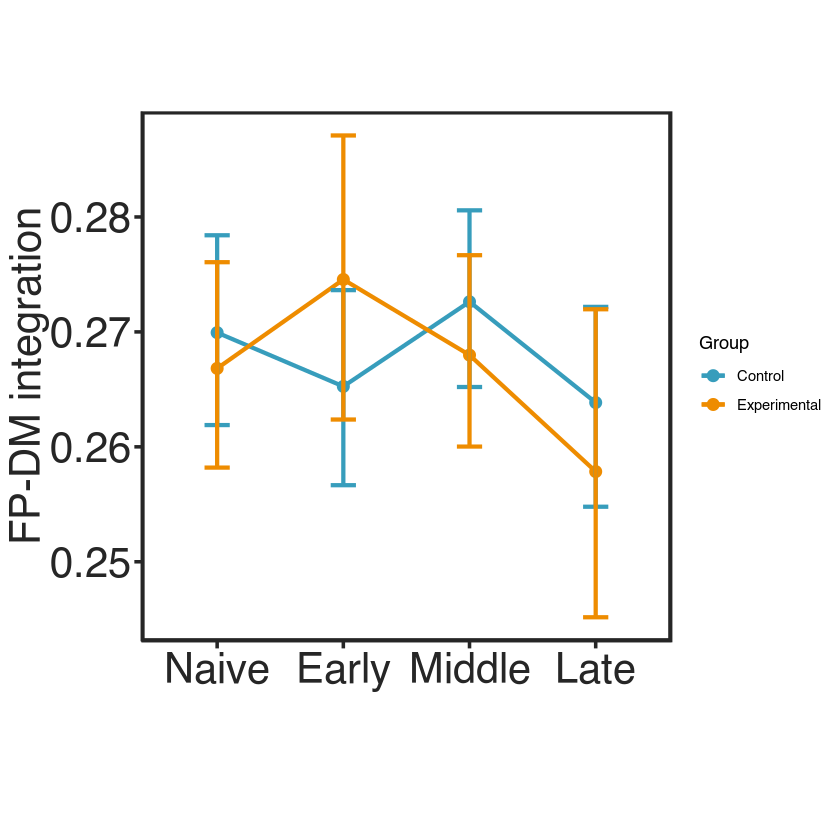

In [29]:
p <- ggplot(dmn, aes(x = Session, y = FP, col = Group)) +
    stat_summary(fun.y = mean, geom = 'point', size = 3) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Group)) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    scale_colour_manual(values=c('#379dbc','#ee8c00')) +
    ylab('FP-DM integration') +
    #facet_wrap(~Group) +
    xlab(' ') +
    theme_training
p

ggsave("figures/Figure_FPN-DMN_integ.pdf", plot = p, width = 6, height = 6, dpi = 300)  

In [42]:
dmn_nl <- dmn %>% filter(Session %in% c('Naive', 'Late'))

dmn_exp <-  dmn_nl %>% filter(Group == 'Experimental') 
dmn_con <-  dmn_nl %>% filter(Group == 'Control') 

t.test(dmn_exp$FP ~ fpn_exp$Session, paired = TRUE)
t.test(dmn_con$FP ~ fpn_con$Session, paired = TRUE)


	Paired t-test

data:  dmn_exp$FP by fpn_exp$Session
t = 1.3696, df = 20, p-value = 0.186
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.004694979  0.022648411
sample estimates:
mean of the differences 
            0.008976716 



	Paired t-test

data:  dmn_con$FP by fpn_con$Session
t = 1.4838, df = 20, p-value = 0.1534
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.002469454  0.014640160
sample estimates:
mean of the differences 
            0.006085353 


In [43]:
naive <- dmn_nl %>% filter(Session == 'Naive') 
t.test(naive$DM ~ naive$Group, paired = FALSE)


	Welch Two Sample t-test

data:  naive$DM by naive$Group
t = -1.4227, df = 39.956, p-value = 0.1626
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.037972883  0.006598244
sample estimates:
     mean in group Control mean in group Experimental 
                 0.3538219                  0.3695092 
